<a href="https://colab.research.google.com/github/tinatrinh8/Classification-Empirical-Study/blob/main/ClassificationStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION EMPIRICAL STUDY: NAIVE BAYES VS LOGISTIC REGRESSION**

**Goal**

Perform a classification empirical study on 2 algorithms: Naive Bayes vs Logistic Regression.



------------------------------------------------------------------------------



**Import important libraries**

In [ ]:
import pandas as pd
import numpy as np

**1. Classification Task & Dataset**

*Explain the goal of chosen dataset. Mention its goals and any specific detail.*


The goal of this dataset is classifying cars based on its unique characteristics, thus this can help people make informed decisions before buying a car. certain cars have different purposes and strength, thus analyzing them can be helpful for recommendations.

Besides the fact that the dataset is clear and concise, it relates to the real world. This makes classification of cars more pratical to apply in our day-to-day lives as it's a common decision-making for people. The reason why it's clear as well it's due to its direct nature with manageable data size as the specific application is with 4 distinct classes: "unacceptable," "acceptable," "good," and "very good.". Classifying these cars into these categories is crystal clear for informed decision-making.

Below, we have put in a url for our chosen dataset. We have split them into distinct column names with specific attributes that could be relevant classification.

In [ ]:
url = "https://raw.githubusercontent.com/SuperChentao/CSI4106_Assignment1/main/car.data"
column_names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv(url, delimiter="," , names=column_names)


*Characterize the dataset in terms of number of training examples, number of
features, missing data, etc.*

As the above, we listed the four levels which can be valuable for car purchases. It contains 1728 samples with each sample coresponding to a different car model. There are also 6 attributes/features which can help predict where the cars can be specified as fewer attributes can reduce complexity. On the link of the dataset, there are also no missing values, which again makes us ready to consider less edge factors.

Now let's see the first 20 entries (rows):

In [ ]:
df.head(20)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc




---



**2. Brainstorm about the Attributes - Feature Engineering**

*Think about the features that could be useful for this task, are they all present in the
dataset? Anything missing? Any feature provided that doesn’t seem useful? Do you have the domain expertise to answer these questions? If you don't, think of ways to explore the attributes to establish whether they appear to influence the classification.*

Features that could be useful for this task has been listed in the column names.

**Buying**: The buying price of the car as its initial cost. This is the most obvious attribute for buyers.

**Maintenance**: The price of maintenance cost for a car overtime. Also useful to see how someone would have to pay to keep the car in shape.

**Doors**: The number of doors in a car could impact the appeal.

**Persons**: The number of passengers. This can determine the amount of people the car can contain.

**Luggage Boot**: The size of luggage boot for those who need storage space.

**Safety**: Safety is also an important concern when driving.

**Class**: Which have already been stated in class levels.

But here are some features that may seem useful that aren't listed fuel efficiency, brand, mileage and popularity. Similar to maintenance cost, knowing how much fuel a car can run is important as the buyer would like to know how many times they would need to refill. The brand of a car is important as most consumers would buy based on its company anyways, especially with the quality/luxury. Mileage can be also important to see the distance a car can reach. This might not be a physical or evidently present factor but it could still be an important knowledge. Finally, the popularity of the specific type of of car a buyer might get is important to see the deamd in the market and seeing how customer who previously have bought can showcase its value.

A feature that might not seem useful could be door as it could also pertain to the number of passengers. The number or doors can only be limited to 2,4 or maybe 5. However, that doesn't do much of how people can enter the car, the only reason why it could be an appeal would be the size or the look of it. The number of people that could enter would just mean the amount of passengers that can fit, not necessarily how.

Some ideas for unique attributes for car purchases that could suggested by "domain experts" are more features that internal, not necessarily general. These are specfic reccommendations to make the car even more enhanced, not necessarily the primary reason to get a car. The price and brand for example are a given, but examples like backup camera, blind-spot monitoring, car-play, automatic high-beams, keyless entry and bluetooth, are just personal features to make the car better that experts suggest. However, when it comes to the actual car itself, it should be a given or based on what the car buyers want. Furthermore, the types of experts to help consumers looking into buying a new car could be consultors/agents.

*What are the ranges of each feature? Try to compare and visualize those ranges. We discussed in class that attribute normalisation is often promoted as empirically helping to improve performances. Do you think this would be useful for your study?*

Below the code snippet showcases the ranges of each feature within our car dataset:


In [ ]:
# This feature removes class from df
df_features = df.drop(columns=['class'])
df_features.head(20)

# Store class variable in df
df_class = df['class']
df_class.head(20)

# Display each column values
for column in df_features.columns:
  print(df_features[column].unique())
print(df_class.unique())

# from sklearn.preprocessing import StandardScaler, normalize
# sc = StandardScaler()
# df_normalized = normalize(df_features)
# print(df_normalized[:1])

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


The different ranges can be categorized into numbers and words. Some of them are similar like passenger and doors with numbers, While buying and maintenance are also similar with the sane description. This can be easier when analyzing later on. But overall, there aren't many attributes within the feature to overcomplicate it. This representation can be helpful for understanding underrepresented and overrepresented categories. Visualizing and understnad features that can detect abnormalities in the data which make the standard accuracy not in the best metric as well. It's important to see all the layed out facts.



---



**3. Encode the Features**

*As you will use models that need discrete or continuous attributes, think about data
encoding and transformation.*

Below, we encoded the categorical features in our car dataset using LabelEncoder from scikit-learn. This makes it suitable for modelling in Naive Bayes or Logistic Regression:

In [ ]:
# Import function for cross-validation and encoding categorical features library
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Define the feature matrix 'x' and target variable 'y' and set them
y = df_class
X = df_features

# Create a list of the objects of each feature into the dataset
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]

# Convert feature matrix into np array
X=X.values

# Loop through each feature and apply label encoding to the i-th feature
for i in range(X.shape[1]):
  X[:, i] = label_encoders[i].fit_transform(X[:, i])

Here we print out the ouput of the new numerical values from each caterogry or each feature:

In [ ]:
print(X)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]




---



**4. Define 2 Models**

*Using the default parameters from scikit-learn. These will be used for evaluation for in our next step.*

First, we import the Naiyes Bayes Model. We use CategoricalNB as mentioned per categorical features and create an instance of it as well.

In [ ]:
from sklearn.naive_bayes import CategoricalNB

# Default Naive Bayes model
model = CategoricalNB()

Then, we import the Logistic Regression Model and create an instance of it.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Default Logistic Regression Model
model2 = LogisticRegression()



---



**5. Train/Test/Evaluate Models in Cross-Validation**

*We will use a 4-fold cross validation. Then perform an evaluation with precision/recall measures to calculate and store the scores for macro & micro averages.*

In [ ]:
# Import important module
from sklearn.metrics import make_scorer, precision_score, recall_score

Perform recall/precision on Naive Bayes Model below:

In [ ]:
# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store precisions and recalls
defaultBayesAccuracy=np.array([precision1,precision2,recall1,recall2])

macro precision[0.31001929 0.56172437 0.35987374 0.56116449]
micro precision[0.75694444 0.8125     0.7662037  0.46527778]
macro recall   [0.3125     0.47455136 0.36104788 0.60451159]
micro recall   [0.75694444 0.8125     0.7662037  0.46527778]


Now perform precision/recall on Logistic Regression Model below:

In [ ]:
# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store precisions and recalls
defaultRegressionAccuracy=np.array([precision1,precision2,recall1,recall2])

macro precision[0.30269886 0.30433647 0.33919271 0.24473684]
micro precision[0.62731481 0.64814815 0.68055556 0.6712963 ]
macro recall   [0.34029497 0.33114171 0.30277521 0.2631588 ]
micro recall   [0.62731481 0.64814815 0.68055556 0.6712963 ]


*Compare micro and macro averages on precision and recall. Discuss the differences (if any) obtained. For your particular dataset, are the classes balanced? That would impact the micro/macro results.*

To compare, we must need to know what they each are. Macro averaging gives equal weight to each category regardless of size. It calculates precision and recall sepererately for each class, then finds their average. This method gives equal weight to each category. In comparison, micro averaging considers each individual sample when calculating precision and recall. It's useful when the dataset has many more samples. thus it takes more into account the contribution of each data point.

In Naive Bayes, the micro scores are the same range or 0.7 and the macro scores being around 0.3. Similar to the Logistic Regression, the micro scores are slightly lower but the same with around 0.6, while the macro scores are the same with 0.3. In both results of Naive Bayes and Logistic Regression, both micro presision and recall are higher compared to the macro precision and recall scores. This could suggest some imbalance in the dataset that have classes with more samples than others since generally micro averaging has better accuracy. Meaning that micro averaging emphasizes the performance of larger classes, thus having higher micro scores, which is why it would be more useful here. This is the case with Naive Bayes with micro scores being notably higher than macro values with larger sizes. Comparatively, macro averaging evaluates the performance of each model on an equal class scale. In this manner, macro precision and recall are lower due to performing well on all classes, especially with fewer classes. For Logistic Regression, a simialr situation occurred with micro values higher than macro values, suggesting class imbalance. Speaking on the class imbalance, the distributions of samples across different classes in the car dataset has different class sizes. This could affect the performance and the way averaging prioritizes the sample. We would need to adjust some paarameters that pose the imbalance class - which can be done in step 6.

The accuracy for predicting some classes with larger sample is relatively high, therefore, the micro precision and recall are higher than macro ones.



---



**6. Train/Test/Evaluate Models AGAIN!!!!**

*Modify some parameters, and perform a train/test/evaluate again. Do this for two times each for Naive Bayes and Logistic Regression.*

Test on this model might generate some warning messages:

In [ ]:
import warnings
# warnings.simplefilter(action='ignore', category={FutureWarning, UserWarning})

Now we calculate the Naive Bayes model with CategoricalNB using a different parameter of setting: alpha=0.

In [ ]:
# Create Naive Bayes model with parameter alpha=0(default is 1)
model = CategoricalNB(alpha=0)

# Calculate macro avg precision score using cross validation
precision1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precision score using cross validation
precision2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store precisions and recalls
VariantBayesAccuracy1=np.array([precision1,precision2,recall1,recall2])

macro precision[0.31001929 0.50067935 0.37025485 0.56116449]
micro precision[0.75694444 0.8125     0.76157407 0.46527778]
macro recall   [0.3125     0.47277228 0.36616491 0.60451159]
micro recall   [0.75694444 0.8125     0.76157407 0.46527778]


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

Now we use a different specific alpha parameter of value 100 but still in Categorical Naive Bayes.

In [ ]:
# Create a Naiyes Bayes model with parameter alpha=100
model = CategoricalNB(alpha=100)

# Calculate macro avg precision score using cross validation
precision1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precision score using cross validation
precision2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store the precisions and recalls
VariantBayesAccuracy1=np.array([precision1,precision2,recall1,recall2])

macro precision[0.28468266 0.41741182 0.43161094 0.35837438]
micro precision[0.68287037 0.81481481 0.81481481 0.80555556]
macro recall   [0.30210912 0.39183684 0.38376104 0.37334437]
micro recall   [0.68287037 0.81481481 0.81481481 0.80555556]


Moving onto Logistic Regression, we are going to calculate the recall and precision with a different parameter: tol=1e-5

In [ ]:
# Create a Logistic Rgression model score using a specific tolerance value
model2 = LogisticRegression(tol=1e-5)

# Calculate macro avg precision score using cross validation
precision1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precision score using cross validation
precision2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store precisions and recalls
variantRegressionAccuracy1=np.array([precision1,precision2,recall1,recall2])

macro precision[0.30269886 0.30433647 0.33919271 0.24473684]
micro precision[0.62731481 0.64814815 0.68055556 0.6712963 ]
macro recall   [0.34029497 0.33114171 0.30277521 0.2631588 ]
micro recall   [0.62731481 0.64814815 0.68055556 0.6712963 ]


Now with another different tolerance value and solver set for Logistic Regression: tol=1e-5 and liblinear.

In [ ]:
# Create a Logistic Rgression model score using another different tolerance value
model2 = LogisticRegression(tol=1e-5, solver="liblinear")

# Calculate macro avg precision score using cross validation
precision1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, zero_division=0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precision score using cross validation
precision2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model2, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

# Store precisions and recalls
variantRegressionAccuracy2=np.array([precision1,precision2,recall1,recall2])

macro precision[0.28901378 0.30530021 0.25016026 0.24759162]
micro precision[0.65046296 0.65509259 0.68055556 0.67592593]
macro recall   [0.29646246 0.32415429 0.26291736 0.26481443]
micro recall   [0.65046296 0.65509259 0.68055556 0.67592593]


*State clearly what parameters you are changing using comments and a different cell per experiment. The parameters should be chosen in a way that they have an impact on the performance of the model. Parameters such as the number of iterations or “verbose” for logistic regression are not acceptable. For example, for Naïve bayes you can change the smoothing parameter. For Logistic Regression you can change the solver or tolerance. Explore changing other parameters (if any) than suggested.*

As a summary, for the Naive Bayes Model, we varied the smoothing parameter (aka the alpha) to test its performance. We tested two values: alpha=0, no smoothing, and alpha=100, strong smoothing.

For the Logistic Regression Model, we varied with the solver parameter. We tested two values: the tolerance and the other was the tolerance and solver liblinear.



---





**7. Analyze Obtained Results**

*Compare quantitatively (with the precision/recall measures) your 6 results. Your 6 results should use the same cross-validation technique (same k). The 6 results come from 2 models, each with default parameters from step 5 + 2 variations from step 6. Make sure to show your tests in cells. If you are making graphs for visualization, the values should not be "hardcoded".*


Let's start with the Naive Bayes Model. We created three different experiments, one with default parameter, one with no smoothing and the other with strong smoothing. We will visualize this.

**Naive Bayes: Average Macro Precisions**


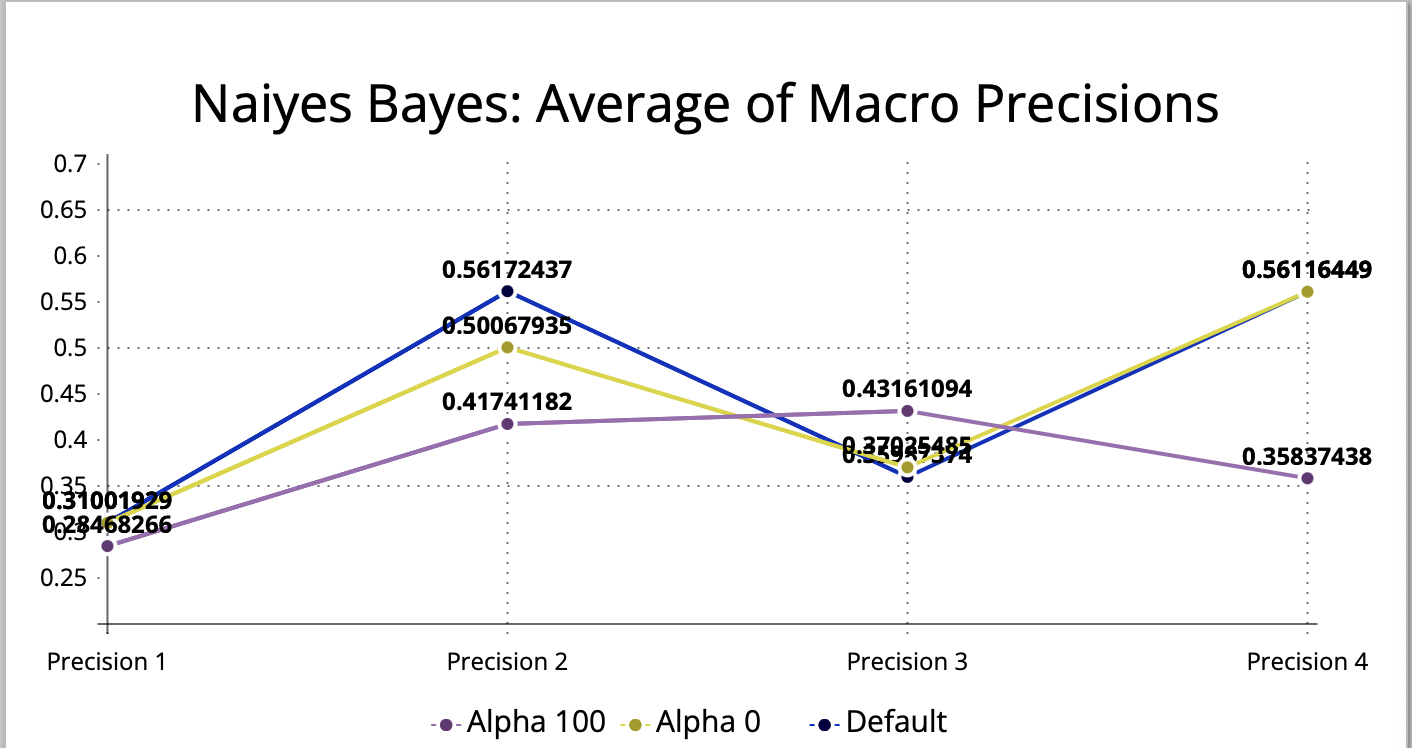

**Naive Bayes: Average Micro Precisions**


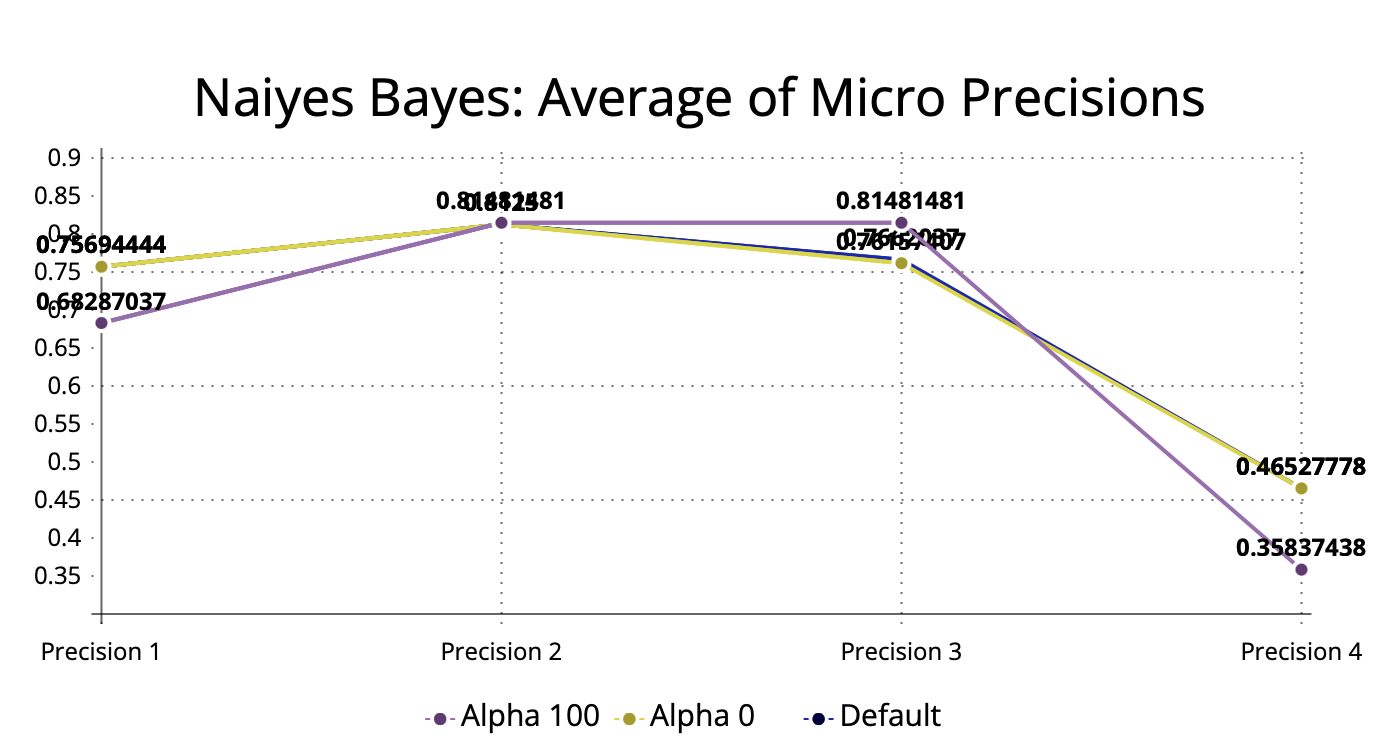

**Naive Bayes: Average Macro Recalls**


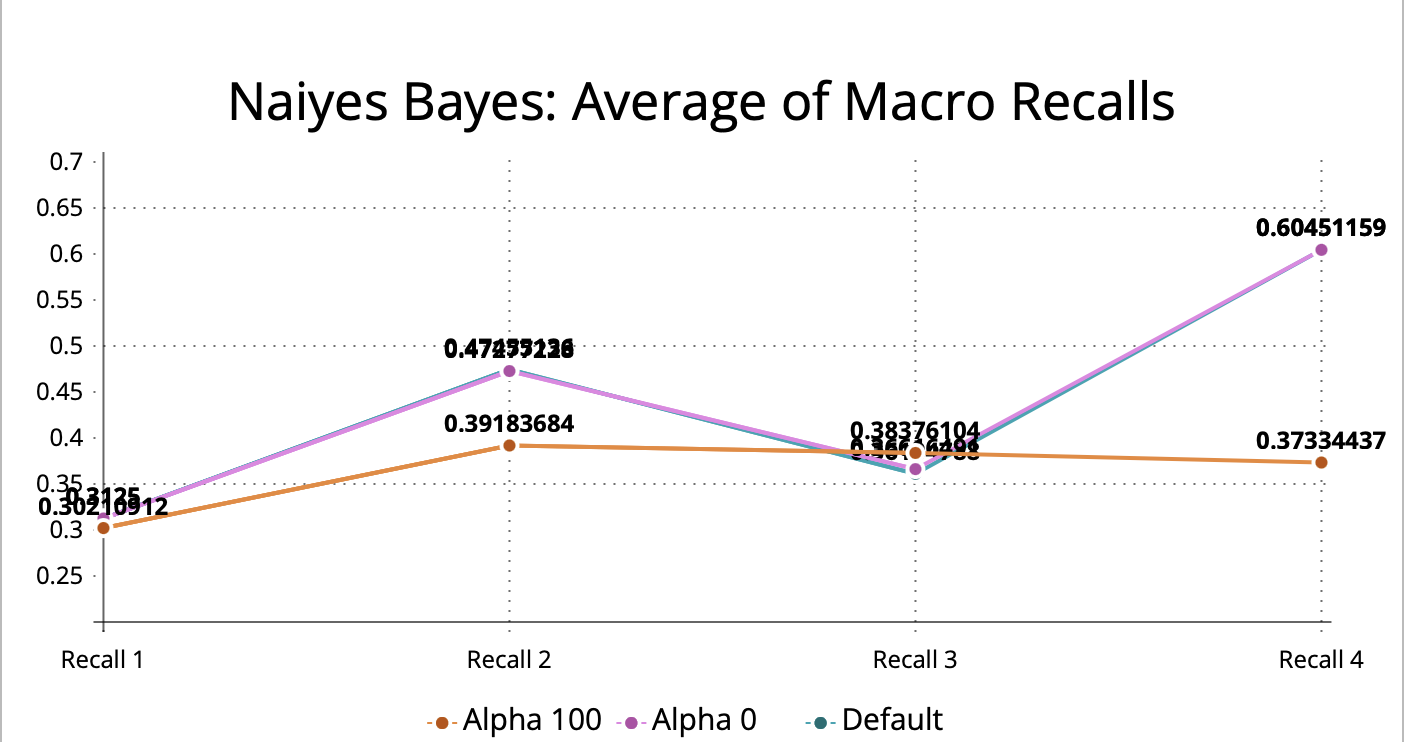

**Naive Bayes: Average Micro Recalls**

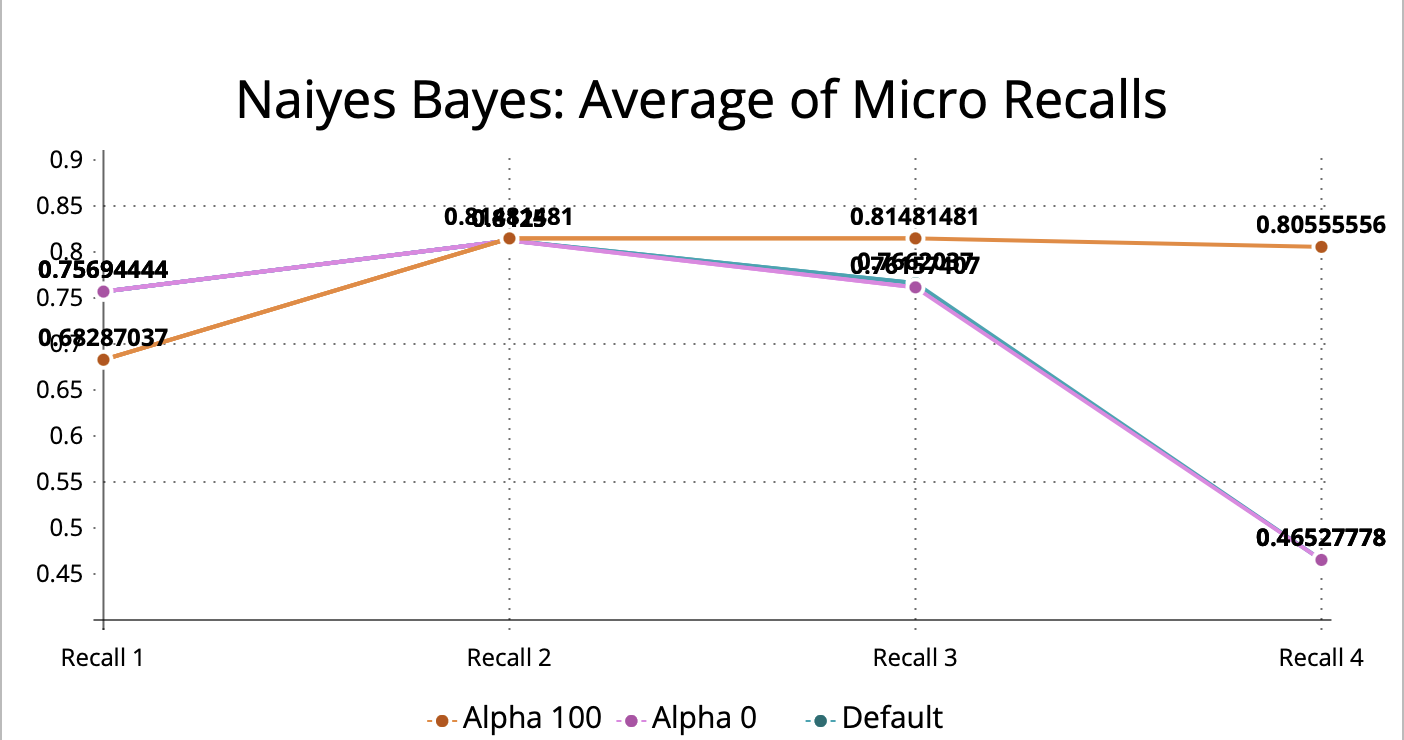

Let's now move onto Logistic Regression Model. We created three different experiments, one with default parameter, one with a tolerance solver and the other with a different tolerance solver & solver set. We will visualize this.

**Logistic Regression: Average Macro Precisions**

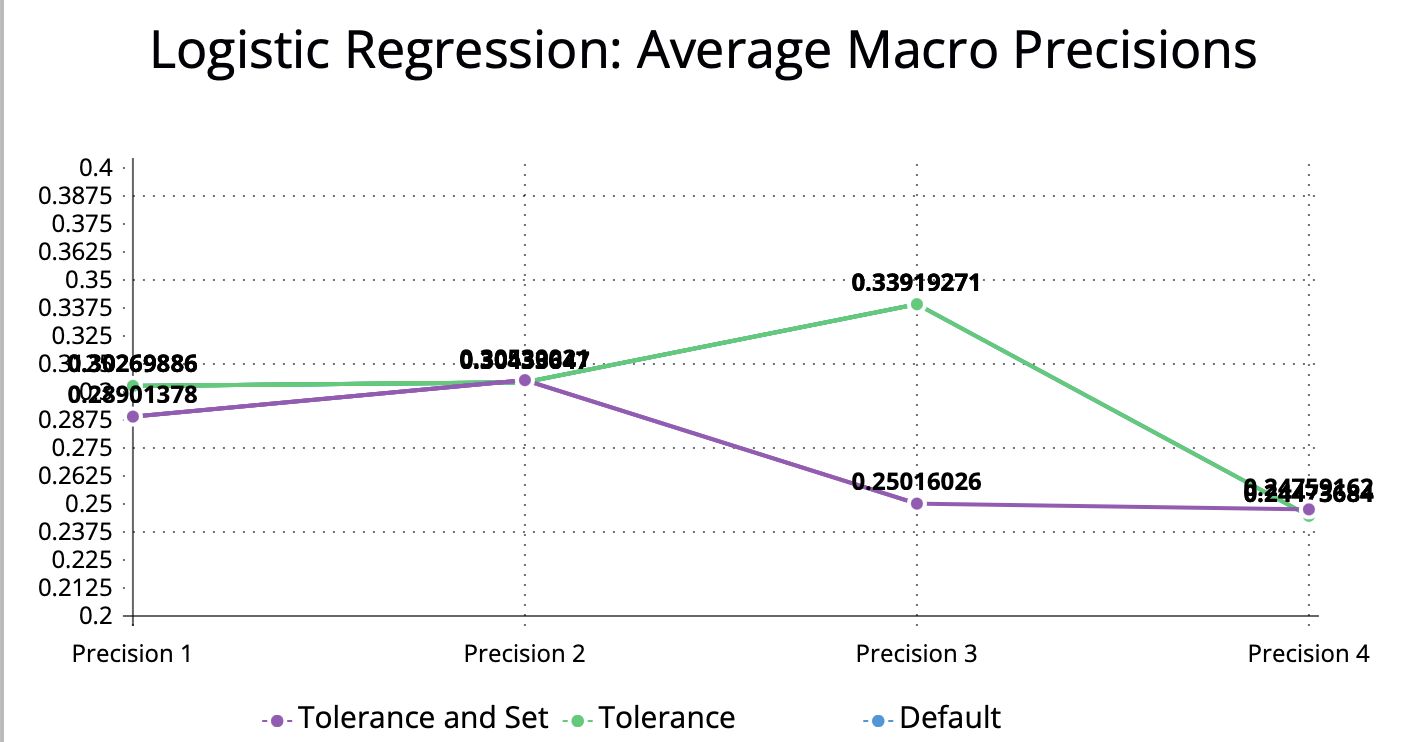

**Logistic Regression: Average Micro Precisions**

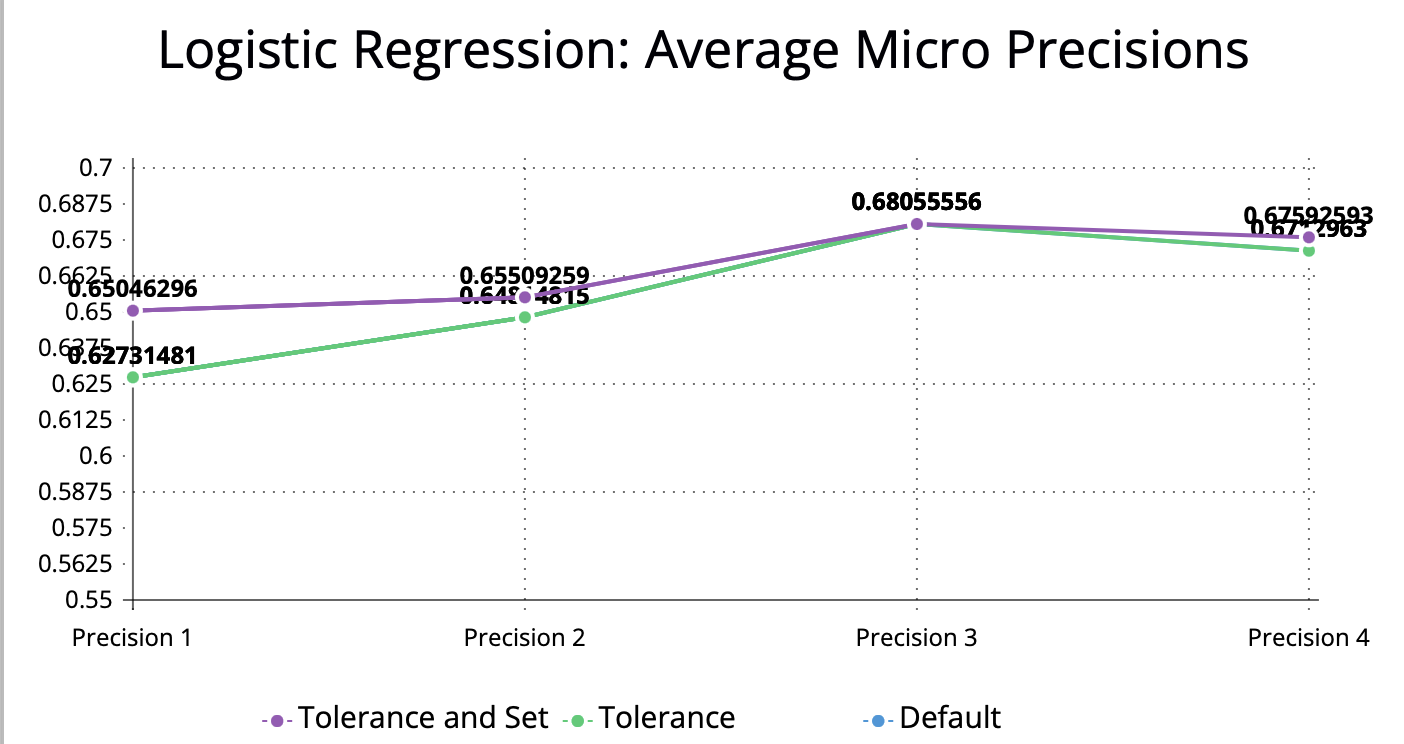

**Logistic Regression: Average Macro Recalls**

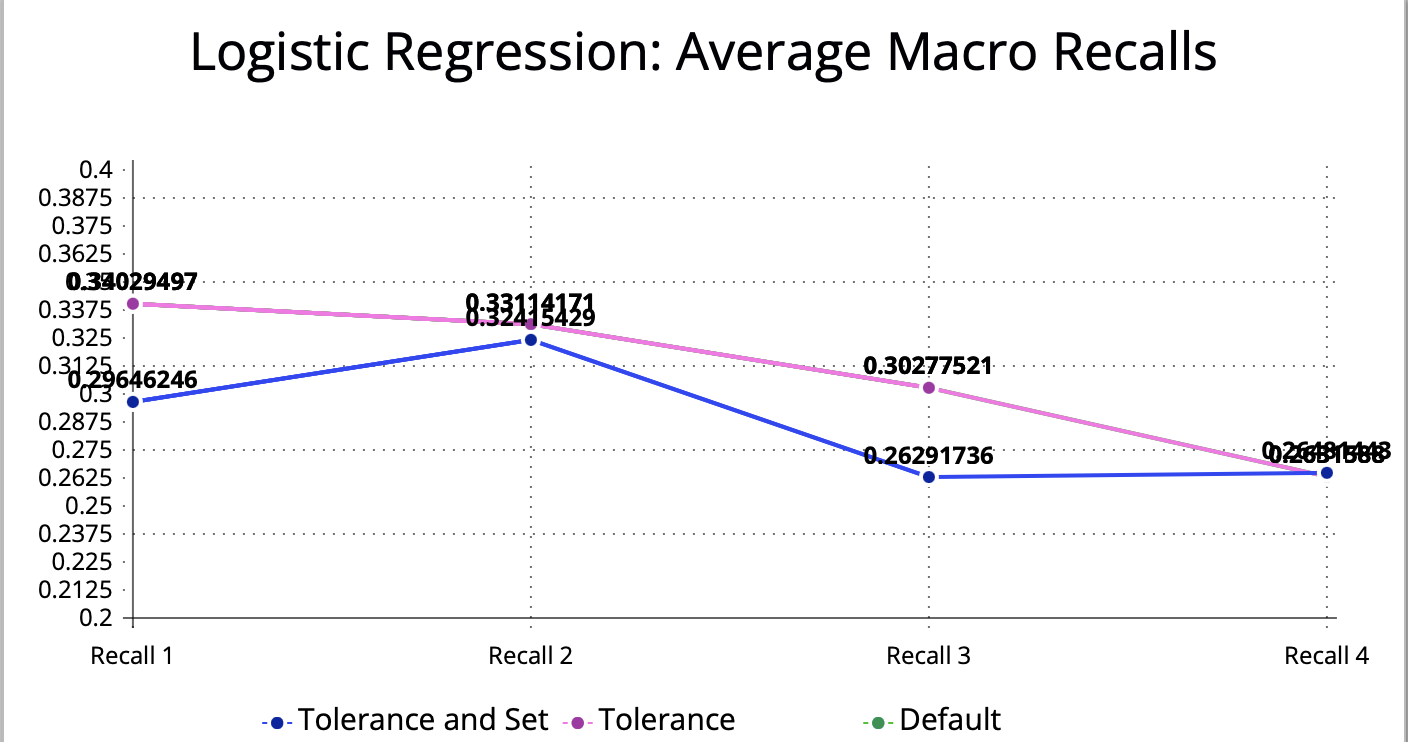

**Logistic Regression: Average Micro Recalls**

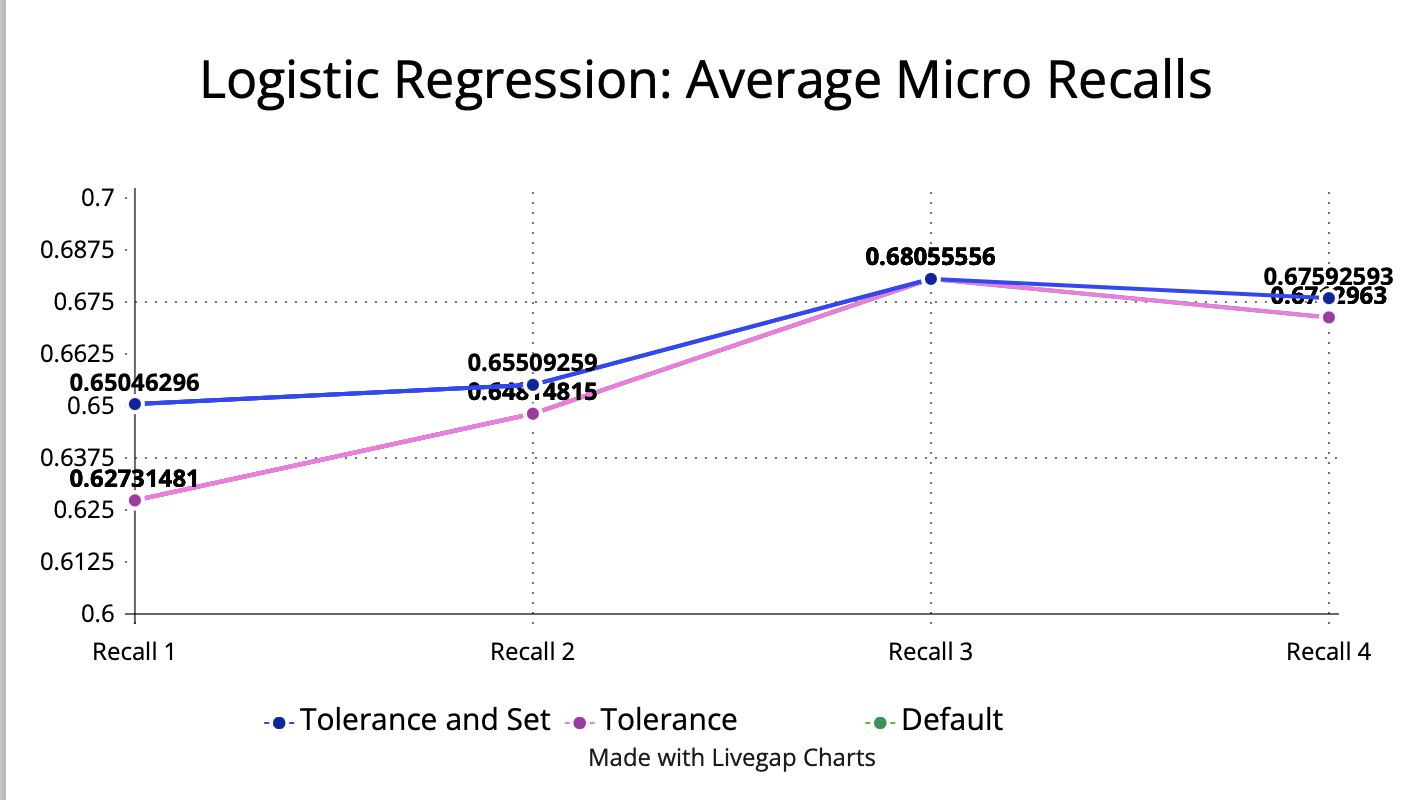

To understand the way we did the graphing, having each graph compare between each data points across the type of model, type of macro/micro and recall/precision split up makes it easier to understand when looking at the big picture. Therefore, we decided to visualize between each parameter on one graph to see if there are any differences when slightly changing the parameter.

**Means of Values**


1. Naive Bayes (alpha = 1):
Macro Precision: Mean = 0.44845,
Micro Precision: Mean = 0.6980,
Macro Recall: Mean = 0.4387,
Micro Recall: Mean = 0.6980

2. Naive Bayes (alpha = 0):
Macro Precision: Mean = 0.4355,
Micro Precision: Mean = 0.6991,
Macro Recall: Mean = 0.4389,
Micro Recall: Mean = 0.6991

3. Naive Bayes (alpha = 100):
Macro Precision: Mean = 0.3730,
Micro Precision: Mean = 0.7795,
Macro Recall: Mean = 0.3628,
Micro Recall: Mean = 0.7795

4. Linear Regression (default):
Macro Precision: Mean = 0.2972,
Micro Precision: Mean = 0.6568,
Macro Recall: Mean = 0.3096,
Micro Recall: Mean = 0.6568

5. Linear Regression (tol=1e-5):
Macro Precision: Mean = 0.2977,
Micro Precision: Mean = 0.6568,
Macro Recall: Mean = 0.3093,
Micro Recall: Mean = 0.6568

6. Linear Regression (tol=1e-5, solver="liblinear"):
Macro Precision: Mean = 0.2730,
Micro Precision: Mean = 0.6655,
Macro Recall: Mean = 0.2868,
Micro Recall: Mean = 0.6655


*Make sure that you compare with micro and macro averages on precision and recall. Discuss the differences (if any) obtained.*

**Precision**

Let's start with Naive Bayes, we'll begin with the changes of the parameters in general. Throughout all 2 graphs whether it's macro/micro, the default parameter and the alpha 0 parameter both have slight consistency with the data points as it goes in similar motions. However, in the third variation of a strong smoothing, the data points seem to be a bit inconsistent especially with the last two points. To give an example, the micro recall has three varying points are 0.4653 and 0.80556 – which is seen throughout the graphs.

Now comparing the overall micro/macro precisions. Above, we have calculated the mean between each which displays that all micro values are still higher than macro values, which is consistent to what we stated before in step 5. The highest precision parameter is the no smoothing as per the calculation and the graphing. But, specifically, the alpha = 0 has the highest macro precision. But the highest micro precision goes to alpha = 100, and highest overall. This means the lowest average is the macro precision in alpha=100. And the lowest micro precision is the alpha default. This is quite interesting as both the strong smoothing contains the highest and lowest averages, which can cause imbalance.

Now moving onto the Logistic Regression model. Throughout the 2 graphs, it's the same with precision having inconsistency, where it's not in the same flow as it's the tolerance and set parameter that doesn't match. But compared to the Naive Bayes, the points are more consistent, but it's only the third points on the average macro precision that are different. Unlike Naive Bayes, the default and alpha=0, both have identical precision averages. This change indicates that the tolerance didn't vastly improve between the model's precision. The strong smoothing parameter is just slightly different.

Now with the overall micro/macro precision. The micro results are all higher compared to the macro scores in Logistic Regression. The only difference models is that the micro, in here is slightly lower, but overall still high. The highest macro precision is the parameter with tol=1e-5, which is quite low compared to the highest macro precision over the Naive Bayes. Now, the highest micro precision is the default and tol=1e-5, as explained earlier that their averages are all the same when graphing in this model. The lowest precision in parameter tol=1e-5, solver="liblinear", which is the "slightly different" one. This means that the tolerance solver parameter has the best quality of prediction between both macro and micro. The micro precision of the default model is consistent with the other logistic regression models, showing that the models are relatively stable in predicting the overall instances correctly.





**Recall**

Let's start with Naive Bayes model, same with the precisions above, the two recall graphs have inconsistency in the last data point concerning the strong smoothing. Besides that, the other two parameters have sligtly consistent in the averaged points. The micro values continue to be vastly larger than the macro.

Comparing the overall macro/micro recalls. The mean macro recall is 0.3096, consistent with the other logistic regression models. And, the mean value of 0.6568 for micro recall confirms the model's ability to predict the majority of instances correctly. The highest macro recall in this model is also the no smoothing and the highest micro recall is strong smoothing. The lowest recall overall is the strong smoothing as well which is quite interesting, as alpha=100 contains both highest and lowest.

With the Logistic Regression, equally the same, the tolerance and set is a bit different from the othe parameters. The default and tolerant paramters are idnetical in the average recall values. But even with the slightly different averages, the recalls are very close in numbers – very close. To repeat once and for all, the micro scores are highest compared to macro ones.

Now with the overall macro/micro overall. To continue the highest macro recall is the default parameter, but overall highest in the recall for Logistic Regression. The highest micro recall is both the default and tolerance solver parameters, as they have the same mean. The lowest recall is with the macro recall of the tolerance solver and set solver.


**Concluding Observations**

The Naive Bayes models have alpha parameters that affect both the precision an recall. When alpha is set to its default value (alpha = 1), the precision and recall are somewhat in the middle of the results observed for alpha=0 and alpha=100. Alpha-0 gives no smoothing, which has a slightly lower precision than alpha=1, but it has similar recall values. However, alpha=100 has a lower macro precision compared to default, but a higher micro precision. In this case, the recall for both micro and macro is less than the default. This means that as we increase the alpha vlaue, the more smoothing it gives, thus can impact the precision and recall due to the model leaning towards a frequent class label.

The logistical Regression performance overall is more consistent when we modify its parameters, this change doesn't bring a strong impact in difference for the precision and recall. As previosuly mentioned, the solver changing to "liblinear" has a slight lesser value in micro decision, but still stable performance.

We concluded that the micro averages of precision and recall are higher compared to the macro averages. This could mean unbalanced classification on datasets with high micro averages while using minority classes, but it might get be clear compared performing on majority classes.

Thus, comparing both models, the Naive Bayes model might have a better performance for this car dataset because of the alpha values. Its precision and recall are relatively high which could be strong when used among many datasets. Logistical Regression's consistency is intriguing, but its relatively low. Because, again, overall the domain, type of data and size could fit this model better. This means macro metrics works best with all classes on an equal plane and the large size & probable positive results lean with micro metrics. In the end, Naive Bayes is the winner in this manner.



---



**References**

## Providing references to ALL sources used (articles, code, algorithms).

In [ ]:
https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging

https://archive.ics.uci.edu/dataset/19/car+evaluation

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

https://bookdown.org/max/FES/handling-missing-data.html

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

https://chat.openai.com/

https://www.statista.com/chart/13075/most-important-factors-when-buying-a-car/

https://www.seattletimes.com/explore/shop-northwest/auto-experts-pick-their-favorite-must-have-car-features/

https://www.consumerreports.org/cars/automotive-technology/must-have-features-to-get-in-next-new-car-a7878321576/

https://www.consumerreports.org/cro/news/2015/03/must-have-car-features-and-those-you-can-skip/index.htm

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#:~:text=Encode%20categorical%20features%20using%20an%20ordinal%20encoding%20scheme.&text=Encode%20categorical%20features%20as%20a%20one%2Dhot%20numeric%20array.&text=LabelEncoder%20can%20be%20used%20to%20normalize%20labels.&text=It%20can%20also%20be%20used,and%20comparable)%20to%20numerical%20labels.

https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://machinelearningmastery.com/k-fold-cross-validation/

https://www.youtube.com/watch?v=TIgfjmp-4BA

https://scikit-learn.org/stable/modules/cross_validation.html

https://stackoverflow.com/questions/46598301/how-to-compute-precision-recall-and-f1-score-of-an-imbalanced-dataset-for-k-fold

https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/

https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

https://charts.livegap.com/app.php?lan=en&gallery=line



